### main point
1. missing completed Random data use mean/medium/les5%

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [53]:
df = pd.read_csv("titanic_toy.csv")

In [54]:
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [55]:
df.isnull().mean()

Age         0.198653
Fare        0.050505
Family      0.000000
Survived    0.000000
dtype: float64

In [56]:
X = df.drop(columns = ["Survived"])
y = df['Survived']

In [57]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [58]:
X_train.shape,X_test.shape

((712, 3), (179, 3))

In [59]:
X_train.isnull().mean()

Age       0.207865
Fare      0.050562
Family    0.000000
dtype: float64

In [60]:
mean_age = X_train['Age'].mean()
median_age = X_train['Age'].median()

mean_fare = X_train['Fare'].mean()
median_fare = X_train['Fare'].median()

In [61]:
X_train['Age_median'] = X_train['Age'].fillna(median_age)
X_train['Age_mean'] = X_train['Age'].fillna(mean_age)

X_train['Fare_median'] = X_train['Fare'].fillna(median_fare)
X_train['Fare_mean'] = X_train['Fare'].fillna(mean_fare)

In [62]:
X_train.sample(5)

,Age,Fare,Family,Age_median,Age_mean,Fare_median,Fare_mean
406,51.0,7.7500,0,51.00,51.000000,7.7500,7.7500
77,NaN,8.0500,0,28.75,29.785904,8.0500,8.0500
69,26.0,8.6625,2,26.00,26.000000,8.6625,8.6625
810,26.0,7.8875,0,26.00,26.000000,7.8875,7.8875
221,27.0,13.0000,0,27.00,27.000000,13.0000,13.0000


In [63]:
print("orginal Age variable variance",X_train['Age'].var())
print("Age variance after median imputation",X_train['Age_median'].var())
print("Age Variance after mean imputer",X_train['Age_mean'].var())

print("ordinal Fare variable variance",X_train['Fare'].var())
print("Fare after mdian impitation",X_train['Fare_median'].var())
print("Fare after mean imputation",X_train['Fare_mean'].var())

orginal Age variable variance 204.34951339046142
Age variance after median imputation 161.98956633460548
Age Variance after mean imputer 161.81262452718676
ordinal Fare variable variance 2448.1979137063163
Fare after mdian impitation 2340.09102197536
Fare after mean imputation 2324.2385256705534


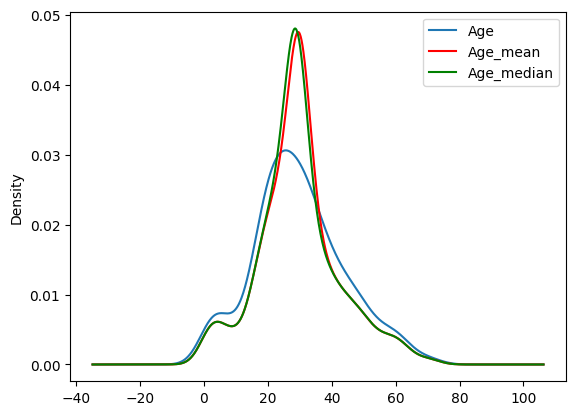

In [64]:
fig = plt.figure()
ax = fig.add_subplot(111)

# ordinal variable distribution
X_train['Age'].plot(kind='kde',ax=ax)

# variable imputed with the mean
X_train['Age_mean'].plot(kind='kde' , ax=ax , color='red')

# variable inouted with mean
X_train['Age_median'].plot(kind='kde',ax=ax , color='green')

# add legend
lines,labels = ax.get_legend_handles_labels()
ax.legend(lines,labels,loc ='best')

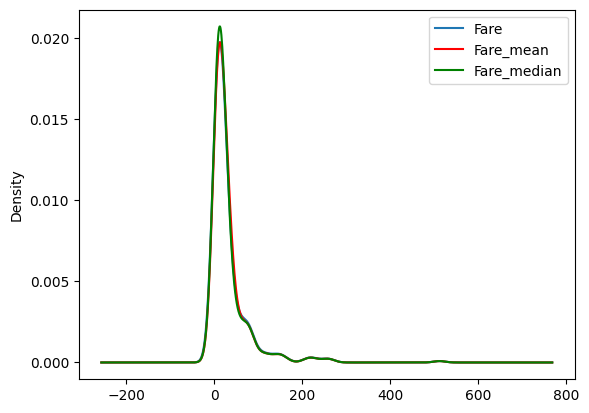

In [65]:
fig = plt.figure()
ax = fig.add_subplot(111)

# ordinal variable distribution
X_train['Fare'].plot(kind='kde',ax=ax)

# variable imputed with the mean
X_train['Fare_mean'].plot(kind ='kde',ax=ax , color='red')

# variable imputed with the median
X_train['Fare_median'].plot(kind='kde' , ax=ax , color='green')
# add legends
lines,labels = ax.get_legend_handles_labels()
ax.legend(lines,labels,loc = 'best')

In [66]:
X_train.cov()

,Age,Fare,Family,Age_median,Age_mean,Fare_median,Fare_mean
Age,204.349513,70.719262,-6.498901,204.349513,204.349513,64.858859,66.665205
Fare,70.719262,2448.197914,17.258917,57.957599,55.603719,2448.197914,2448.197914
Family,-6.498901,17.258917,2.735252,-5.112563,-5.146106,16.476305,16.385048
Age_median,204.349513,57.957599,-5.112563,161.989566,161.812625,53.553455,55.023037
Age_mean,204.349513,55.603719,-5.146106,161.812625,161.812625,51.358000,52.788341
Fare_median,64.858859,2448.197914,16.476305,53.553455,51.358000,2340.091022,2324.238526
Fare_mean,66.665205,2448.197914,16.385048,55.023037,52.788341,2324.238526,2324.238526


In [67]:
X_train.corr()

,Age,Fare,Family,Age_median,Age_mean,Fare_median,Fare_mean
Age,1.000000,0.092644,-0.299113,1.000000,1.000000,0.087356,0.090156
Fare,0.092644,1.000000,0.208268,0.091757,0.088069,1.000000,1.000000
Family,-0.299113,0.208268,1.000000,-0.242883,-0.244610,0.205942,0.205499
Age_median,1.000000,0.091757,-0.242883,1.000000,0.999454,0.086982,0.089673
Age_mean,1.000000,0.088069,-0.244610,0.999454,1.000000,0.083461,0.086078
Fare_median,0.087356,1.000000,0.205942,0.086982,0.083461,1.000000,0.996607
Fare_mean,0.090156,1.000000,0.205499,0.089673,0.086078,0.996607,1.000000


<AxesSubplot: >

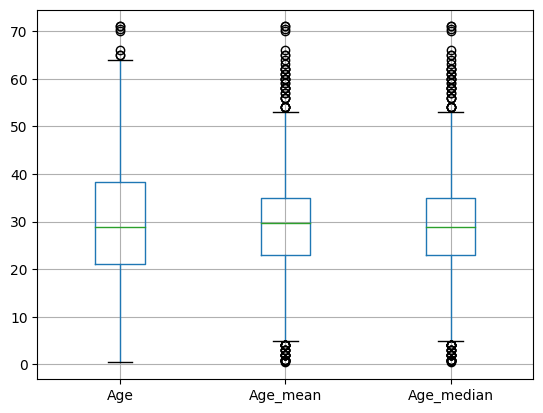

In [68]:
X_train[['Age','Age_mean','Age_median']].boxplot()

<AxesSubplot: >

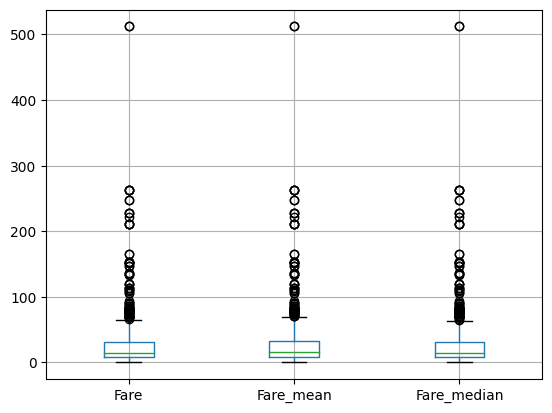

In [69]:
X_train[['Fare','Fare_mean','Fare_median']].boxplot()

# Using Sklearn

In [70]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [71]:
imputer1 = SimpleImputer(strategy='median')
imputer2 = SimpleImputer(strategy='mean')

In [72]:
trf = ColumnTransformer([
    ('imputer1' , imputer1,['Age']),
    ('imputer2' , imputer2,['Fare'])  
],remainder='passthrough')

In [73]:
trf.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1', SimpleImputer(strategy='median'),
                                 ['Age']),
                                ('imputer2', SimpleImputer(), ['Fare'])])

In [74]:
trf.named_transformers_['imputer1'].statistics_

array([28.75])

In [75]:
trf.named_transformers_['imputer2'].statistics_

array([32.61759689])

In [76]:
X_train = trf.transform(X_train)
X_test = trf.transform(X_test)

In [77]:
X_train

array([[ 40.    ,  27.7208,   0.    ],
       [  4.    ,  16.7   ,   2.    ],
       [ 47.    ,   9.    ,   0.    ],
       ...,
       [ 71.    ,  49.5042,   0.    ],
       [ 28.75  , 221.7792,   0.    ],
       [ 28.75  ,  25.925 ,   0.    ]])

# Arbitaray Value imputation

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt

In [79]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [80]:
df = pd.read_csv("titanic_toy.csv")

In [81]:
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [82]:
df.isnull().mean()

Age         0.198653
Fare        0.050505
Family      0.000000
Survived    0.000000
dtype: float64

In [83]:
X= df.drop(columns=['Survived'])
y = df['Survived']

In [84]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [85]:
X_train['Age_99'] = X_train['Age'].fillna(99)
X_train['Age_minus1'] = X_train['Age'].fillna(-1)

X_train['Fare_999'] = X_train['Fare'].fillna(999)
X_train['Fare_minus1'] = X_train['Fare'].fillna(-1)

In [86]:
print("Original Age variable variance",X_train['Age'].var())
print("Age Variance after 99 wala imputerion",X_train['Age_99'].var())
print("Age virance after -1 wala imputer", X_train['Age_minus1'].var())


print("ordinal Fare variable variance",X_train['Fare'].var())
print("Fare Variance after 999 wala imputer",X_train['Fare_999'].var())
print("Fare Variance after -1 wala imputer",X_train['Fare_minus1'].var())

Original Age variable variance 204.34951339046142
Age Variance after 99 wala imputerion 951.7275570187188
Age virance after -1 wala imputer 318.0896202624488
ordinal Fare variable variance 2448.1979137063163
Fare Variance after 999 wala imputer 47219.202652176304
Fare Variance after -1 wala imputer 2378.5676784883494


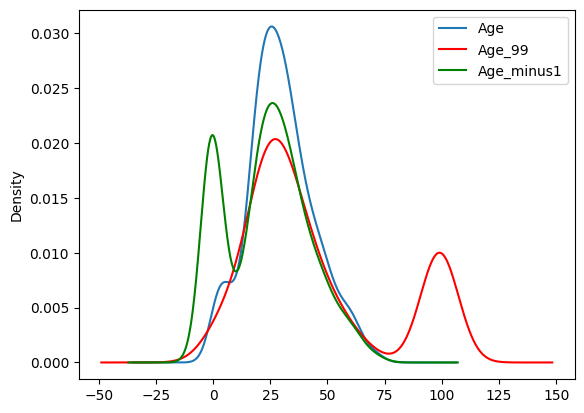

In [87]:
fig = plt.figure()
ax = fig.add_subplot(111)

# ordinal variable distribution
X_train['Age'].plot(kind='kde',ax=ax)

# variable imputed with the medium
X_train['Age_99'].plot(kind='kde',ax=ax,color='red')

#  ordinal imputed with the mean
X_train['Age_minus1'].plot(kind='kde' , ax=ax ,color='green')

# add legend
lines,labels = ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

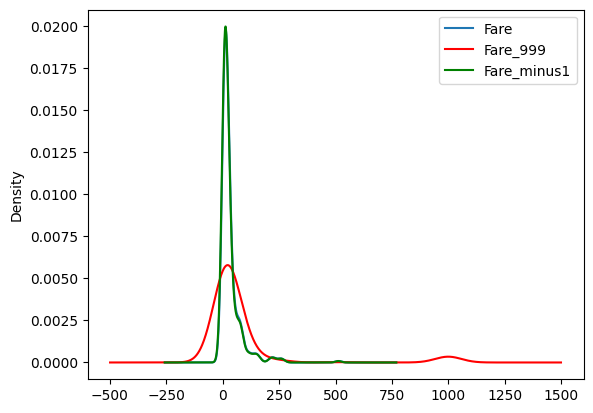

In [89]:
fig = plt.figure()
ax = fig.add_subplot(111)

# ordinal variable distribution
X_train['Fare'].plot(kind='kde',ax=ax)

# ordinal imputed with mean
X_train['Fare_999'].plot(kind='kde',ax=ax,color='red')

# ordinal imputed with medium
X_train['Fare_minus1'].plot(kind='kde',ax=ax,color='green')

lines,labels = ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')


In [90]:
X_train.cov()

,Age,Fare,Family,Age_99,Age_minus1,Fare_999,Fare_minus1
Age,204.349513,70.719262,-6.498901,204.349513,204.349513,162.793430,63.321188
Fare,70.719262,2448.197914,17.258917,-101.671097,125.558364,2448.197914,2448.197914
Family,-6.498901,17.258917,2.735252,-7.387287,-4.149246,11.528625,16.553989
Age_99,204.349513,-101.671097,-7.387287,951.727557,-189.535540,-159.931663,-94.317400
Age_minus1,204.349513,125.558364,-4.149246,-189.535540,318.089620,257.379887,114.394141
Fare_999,162.793430,2448.197914,11.528625,-159.931663,257.379887,47219.202652,762.474982
Fare_minus1,63.321188,2448.197914,16.553989,-94.317400,114.394141,762.474982,2378.567678


In [91]:
X_train.corr()

,Age,Fare,Family,Age_99,Age_minus1,Fare_999,Fare_minus1
Age,1.000000,0.092644,-0.299113,1.000000,1.000000,0.051179,0.084585
Fare,0.092644,1.000000,0.208268,-0.066273,0.142022,1.000000,1.000000
Family,-0.299113,0.208268,1.000000,-0.144787,-0.140668,0.032079,0.205233
Age_99,1.000000,-0.066273,-0.144787,1.000000,-0.344476,-0.023857,-0.062687
Age_minus1,1.000000,0.142022,-0.140668,-0.344476,1.000000,0.066411,0.131514
Fare_999,0.051179,1.000000,0.032079,-0.023857,0.066411,1.000000,0.071946
Fare_minus1,0.084585,1.000000,0.205233,-0.062687,0.131514,0.071946,1.000000


# Useing Sklearn

In [92]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)


In [93]:
imputer = SimpleImputer(strategy="constant",fill_value=99)
imputer3 = SimpleImputer(strategy="constant",fill_value=999)

In [94]:
trf = ColumnTransformer([
    ("imputer",imputer,['Age']),
    ("imputer3",imputer3,['Fare'])
],remainder="passthrough")

In [95]:
trf.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer',
                                 SimpleImputer(fill_value=99,
                                               strategy='constant'),
                                 ['Age']),
                                ('imputer3',
                                 SimpleImputer(fill_value=999,
                                               strategy='constant'),
                                 ['Fare'])])

In [96]:
trf.named_transformers_['imputer'].statistics_

array([99.])

In [98]:
trf.named_transformers_['imputer3'].statistics_

array([999.])

In [99]:
X_train = trf.transform(X_train)
X_test = trf.transform(X_test)

In [100]:
X_train

array([[ 40.    ,  27.7208,   0.    ],
       [  4.    ,  16.7   ,   2.    ],
       [ 47.    ,   9.    ,   0.    ],
       ...,
       [ 71.    ,  49.5042,   0.    ],
       [ 99.    , 221.7792,   0.    ],
       [ 99.    ,  25.925 ,   0.    ]])

## End of Distribution Imputation